# 基于卷积神经网络的手写英文字母识别系统研究

In [19]:
from myCnn.cnnWithAttention.utils import *
from myCnn.cnnWithAttention.attentionStructure import *
from myCnn.cnnWithAttention.train_my_cnn import *

## 基本参数设置

In [20]:
ROOT_DIR = "emnist_png_balanced"  # 数据集路径
BATCH_SIZE = 256  # 批大小
EPOCH = 500  # 训练轮数
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")# 设备选择
LR = 1e-4  # 学习率

### 加入数据增强

训练集每个类别样本数：
类别 0: 700
类别 1: 700
类别 2: 700
类别 3: 700
类别 4: 700
类别 5: 700
类别 6: 700
类别 7: 700
类别 8: 700
类别 9: 700
类别 A: 700
类别 B: 700
类别 C: 700
类别 D: 700
类别 E: 700
类别 F: 700
类别 G: 700
类别 H: 700
类别 I: 700
类别 J: 700
类别 K: 700
类别 L: 700
类别 M: 700
类别 N: 700
类别 O: 700
类别 P: 700
类别 Q: 700
类别 R: 700
类别 S: 700
类别 T: 700
类别 U: 700
类别 V: 700
类别 W: 700
类别 X: 700
类别 Y: 700
类别 Z: 700
类别 a_: 700
类别 b_: 700
类别 d_: 700
类别 e_: 700
类别 f_: 700
类别 g_: 700
类别 h_: 700
类别 n_: 700
类别 q_: 700
类别 r_: 700
类别 t_: 700

验证集每个类别样本数：
类别 0: 150
类别 1: 150
类别 2: 150
类别 3: 150
类别 4: 150
类别 5: 150
类别 6: 150
类别 7: 150
类别 8: 150
类别 9: 150
类别 A: 150
类别 B: 150
类别 C: 150
类别 D: 150
类别 E: 150
类别 F: 150
类别 G: 150
类别 H: 150
类别 I: 150
类别 J: 150
类别 K: 150
类别 L: 150
类别 M: 150
类别 N: 150
类别 O: 150
类别 P: 150
类别 Q: 150
类别 R: 150
类别 S: 150
类别 T: 150
类别 U: 150
类别 V: 150
类别 W: 150
类别 X: 150
类别 Y: 150
类别 Z: 150
类别 a_: 150
类别 b_: 150
类别 d_: 150
类别 e_: 150
类别 f_: 150
类别 g_: 150
类别 h_: 150
类别 n_: 150
类别 q_: 150
类别 r_: 150
类别 t_: 150

测试集每个类别样本数：


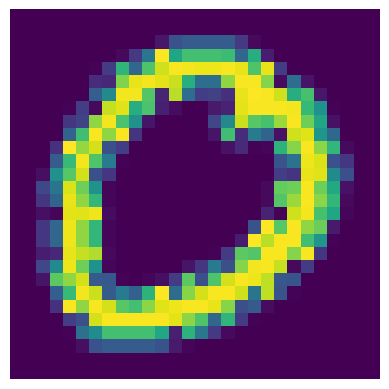

In [21]:
transform = AlbumentationsTransform()  # 使用数据增强

train_loader, val_loader, test_loader, full_dataset = split_dataset(
    root_dir=ROOT_DIR,
    transform=transform,
    train_ratio=0.7,
    val_ratio=0.15,
    test_ratio=0.15,
    batch_size=BATCH_SIZE,
    shuffle=True,
    random_seed=42
)

# 打印数据集大小
print(f"训练集大小: {len(train_loader.dataset)}")
print(f"验证集大小: {len(val_loader.dataset)}")
print(f"测试集大小: {len(test_loader.dataset)}")

# 获取类别数量
label_num = len(full_dataset.class_to_idx)

# 数据可视化
to_img = T.ToPILImage()
a = to_img(train_loader.dataset[0][0])  # size=[1, 32, 32]
plt.imshow(a)
plt.axis('off')
plt.show()

### 训练模型（有注意力机制）

In [22]:
model = CNNWithAttention(label_num, use_attention=True) # 调用模型
print(model)

train_and_validate(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    epochs=EPOCH,
    device=device,
    save_path="cnn_res_attention_aug_best.pth",
)

print("训练结束。")

CNNWithAttention(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (residual): ResidualBlock(
    (conv): Sequential(
      (0): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(32, eps=1e-05,

KeyboardInterrupt: 

### 训练模型（无注意力机制）

In [ ]:
model = CNNWithAttention(label_num, use_attention=False) # 调用模型

train_and_validate(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    epochs=EPOCH,
    device=device,
    save_path="cnn_res_noattention_aug_best.pth"
)

### 无数据增强

In [ ]:
transform = AlbumentationsTransformBase()  # 不使用数据增强


train_loader, val_loader, test_loader, full_dataset = split_dataset(
    root_dir=ROOT_DIR,
    transform=transform,
    train_ratio=0.7,
    val_ratio=0.15,
    test_ratio=0.15,
    batch_size=BATCH_SIZE,
    shuffle=True,
    random_seed=42,
)

# 打印数据集大小
print(f"训练集大小: {len(train_loader.dataset)}")
print(f"验证集大小: {len(val_loader.dataset)}")
print(f"测试集大小: {len(test_loader.dataset)}")

# 获取类别数量
label_num = len(full_dataset.class_to_idx)

# 数据可视化
to_img = T.ToPILImage()
a = to_img(train_loader.dataset[0][0])  # size=[1, 32, 32]
plt.imshow(a)
plt.axis('off')
plt.show()

### 训练模型（有注意力机制）

In [ ]:
model = CNNWithAttention(label_num, use_attention=True) # 调用模型

train_and_validate(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    epochs=EPOCH,
    device=device,
    save_path="cnn_res_attention_noaug_best.pth",
    lr=LR
)

### 训练模型（无注意力机制）

In [ ]:
model = CNNWithAttention(label_num, use_attention=False) # 调用模型

train_and_validate(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    epochs=EPOCH,
    device=device,
    save_path="cnn_res_noattention_noaug_best.pth",
    lr=LR
)